In [358]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb

In [359]:
df = pd.read_csv('train.csv')
df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [360]:
df.columns

Index(['id', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [361]:
df.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


<Axes: >

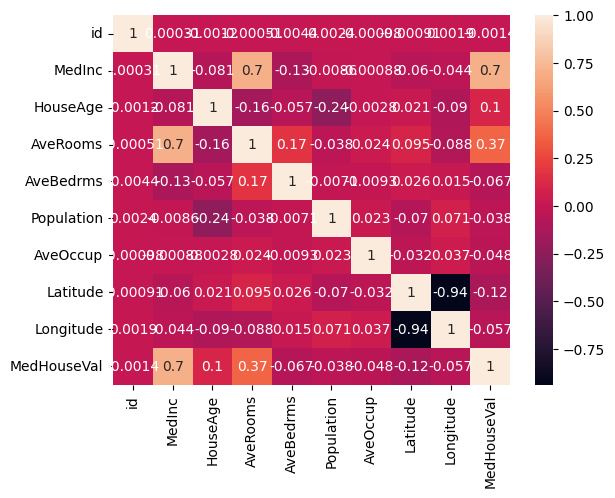

In [362]:
sns.heatmap(df.corr(), annot=True)

In [363]:
print(df.isnull().sum())

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [364]:
features = ['id', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude']

X = df[features]
y = df['MedHouseVal']

# X_test = test_df[features]
# Y_test = test_df['MedHouseVal']

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [366]:
X_train, y_train

(          id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
 7714    7714  3.5000      37.0  4.460000   1.068000       570.0  2.600000   
 32447  32447  1.9489      23.0  4.604613   1.080780      1122.0  2.737057   
 32451  32451  2.7841      26.0  5.652299   1.207547      1644.0  4.192529   
 23542  23542  2.1771      20.0  4.681388   1.111437      1315.0  3.226586   
 9728    9728  4.0000      32.0  5.808271   1.084568       909.0  2.653646   
 ...      ...     ...       ...       ...        ...         ...       ...   
 16850  16850  2.7797      35.0  4.539378   1.035316      1583.0  3.128959   
 6265    6265  3.0481      39.0  5.930000   1.171875       779.0  2.738750   
 11284  11284  3.6346      33.0  5.010462   1.021423      2099.0  2.263598   
 860      860  2.1979      21.0  4.722298   1.039690      1614.0  2.432316   
 15795  15795  2.1449      21.0  5.017953   1.026930      1413.0  2.072797   
 
        Latitude  Longitude  
 7714      37.35    -121.90  
 3

In [367]:
lm = xgb.XGBRegressor()

In [368]:
lm.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [369]:
y_pred = lm.predict(X_test)

In [370]:
mse = mean_squared_error(y_test, y_pred)
mse

0.36969313070886584

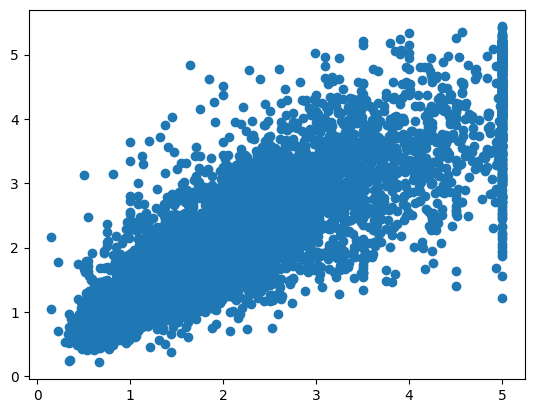

In [371]:
plt.scatter(y_test, y_pred)

In [372]:
df = pd.read_csv('test.csv')

In [373]:
X = df[features]
prediction = lm.predict(X)

In [374]:
results_df = pd.DataFrame({'id': df['id'], 'MedHouseVal': prediction})

In [375]:
results_df.to_csv('prediction.csv', index=False)